In [1]:
import pandas as pd
import scanpy as sc

In [2]:
ctc = sc.read_h5ad('/mnt/c/Users/ouyangkang/Desktop/ctc_with_anno.h5ad')

In [3]:
ctc

AnnData object with n_obs × n_vars = 21408 × 36472
    obs: 'total_counts', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'chip_id', 'patient_info', 'phage_info', '_scvi_batch', '_scvi_labels', 'leiden', 'anno', 'chip_color', 'anno_ctc'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'anno_colors', 'anno_ctc_colors', 'chip_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
ctc_index = ctc.obs[ctc.obs['anno_ctc'] == 'True CTC'].index
ctc = ctc[ctc_index, :]

In [5]:
# exclude negative sample
negative_sample = ['A04086G3', 'C03427D3', 'A04230E2', 'A04230E4_16', 'A04224E3']
positive_index = ctc.obs[~ctc.obs['chip_id'].isin(negative_sample)].index
ctc = ctc[positive_index, :]

In [6]:
sc.pp.filter_genes(ctc, min_cells=1)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:275: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [10]:
ctc

AnnData object with n_obs × n_vars = 261 × 21692
    obs: 'total_counts', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'chip_id', 'patient_info', 'phage_info', '_scvi_batch', '_scvi_labels', 'leiden', 'anno', 'chip_color', 'anno_ctc'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'anno_colors', 'anno_ctc_colors', 'chip_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [14]:
pd.DataFrame(ctc.layers['counts'].todense().T,
             columns=ctc.obs_names,
             index=ctc.var_names).to_csv('ctc_exp_matrix.csv')

In [16]:
sc.pp.neighbors(ctc, use_rep='X_scVI')
sc.tl.leiden(ctc, flavor='igraph', n_iterations=-1)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
sc.tl.umap(ctc, min_dist=0.3, spread=1.75)

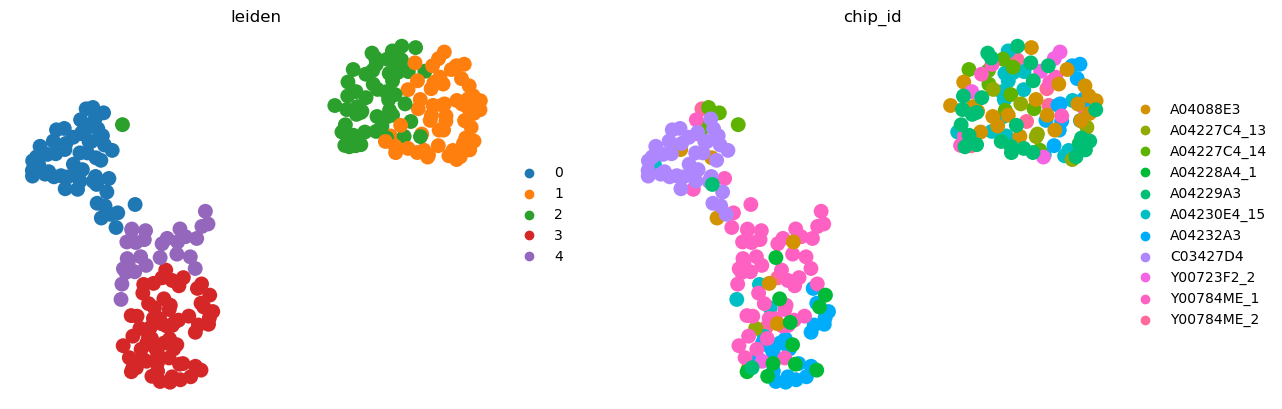

In [18]:
sc.pl.umap(ctc, color=["leiden", 'chip_id'], frameon=False)

In [20]:
ct_mapping = {
    "0": "Cluster_1",
    "1": "Cluster_2",
    "2": "Cluster_2",
    "3": "Cluster_3",
    "4": "Cluster_3"
}
ctc.obs['cell_type'] = ctc.obs['leiden'].replace(ct_mapping)

/tmp/ipykernel_26791/643106272.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ctc.obs['cell_type'] = ctc.obs['leiden'].replace(ct_mapping)


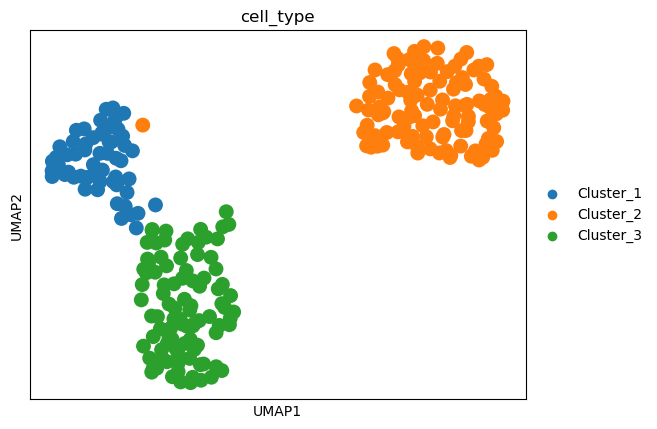

In [21]:
sc.pl.umap(ctc, color='cell_type')

In [24]:
ctc.obs[['cell_type', 'chip_id']].to_csv('pheno_data.csv')

In [3]:
pancreas_adata = sc.read_h5ad('/mnt/c/Users/ouyangkang/Downloads/human_pancreas_norm_complexBatch.h5ad')

In [8]:
pancreas_adata

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors'
    layers: 'counts'